In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
steam_games = pd.read_parquet('steam_games.parquet')
user_reviews = pd.read_parquet('user_reviews.parquet')
users_items = pd.read_parquet('users_items.parquet')

In [4]:
top_recommend = user_reviews[user_reviews['sentiment_analysis']>0].drop(columns={'sentiment_analysis','date'}).groupby('item_id')['recommend'].sum().reset_index().sort_values(by='recommend', ascending=False)
top_recommend['item_id']=top_recommend['item_id'].astype('float')
top_recommend.set_index('item_id',inplace=True)
top_recommend['name'] = steam_games['name']
top_recommend = top_recommend.dropna(subset={'name'}).head(10)


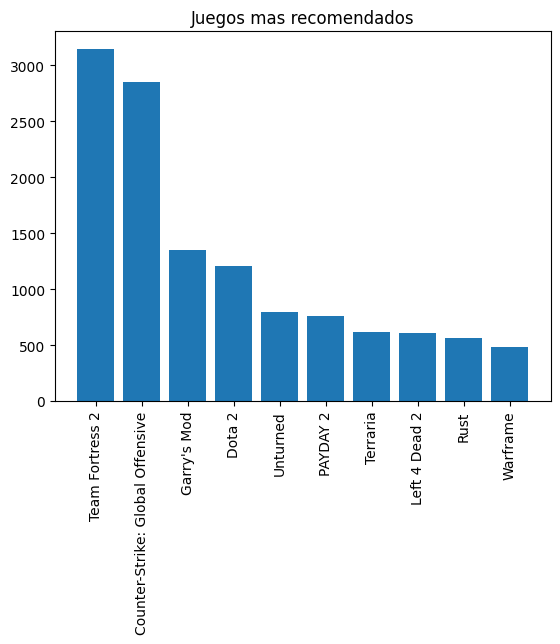

In [6]:
plt.bar(top_recommend['name'].astype(str),top_recommend['recommend'].astype(float))
plt.title('Juegos mas recomendados')
plt.xticks(rotation=90)
plt.show()

In [16]:
top_playtime = users_items.drop(columns={'user_id'}).groupby('item_id')['playtime'].sum().reset_index().sort_values(by='playtime', ascending=False).head(10)
top_playtime['item_id']=top_playtime['item_id'].astype(float)
top_playtime.set_index('item_id',inplace=True)
top_playtime['name'] = steam_games['name']
top_playtime = top_playtime.dropna(subset={'name'})
top_playtime['playtime']=round(top_playtime['playtime']/60)

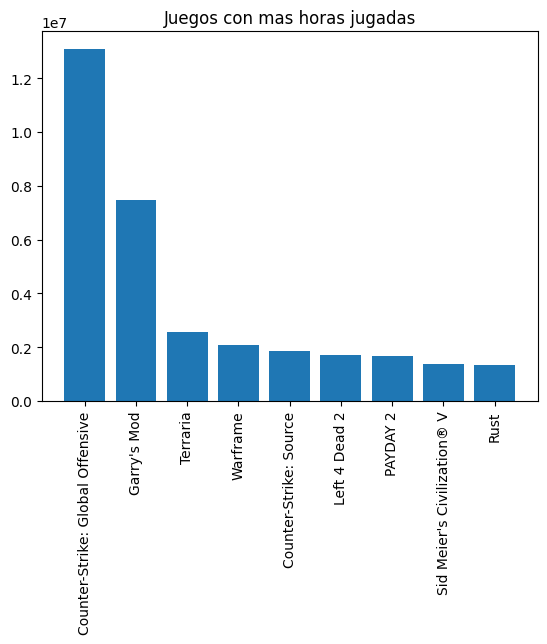

In [17]:
plt.bar(top_playtime['name'].astype(str),top_playtime['playtime'].astype(int))
plt.title('Juegos con mas horas jugadas')
plt.xticks(rotation=90)
plt.show()

In [11]:
steam_genres = steam_games.drop(columns={'name','date'}).explode('genres').apply(pd.Series)
steam_genres = steam_genres['genres'].value_counts().reset_index().sort_values(by='count', ascending=False).head(15)

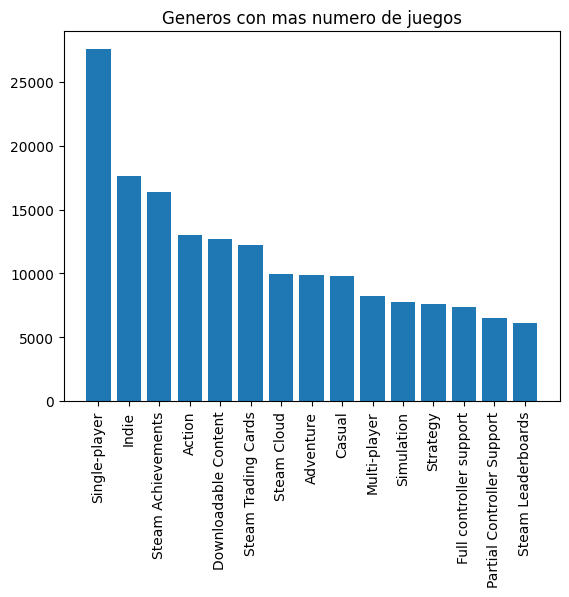

In [12]:
plt.bar(steam_genres['genres'].astype(str),steam_genres['count'].astype(int))
plt.title('Generos con mas numero de juegos')
plt.xticks(rotation=90)
plt.show()

In [18]:
steam_genres2 = steam_games.drop(columns={'name','date'}).explode('genres').apply(pd.Series)
steam_genres2 = steam_genres2['genres'].value_counts().reset_index().sort_values(by='count', ascending=False).tail(15)


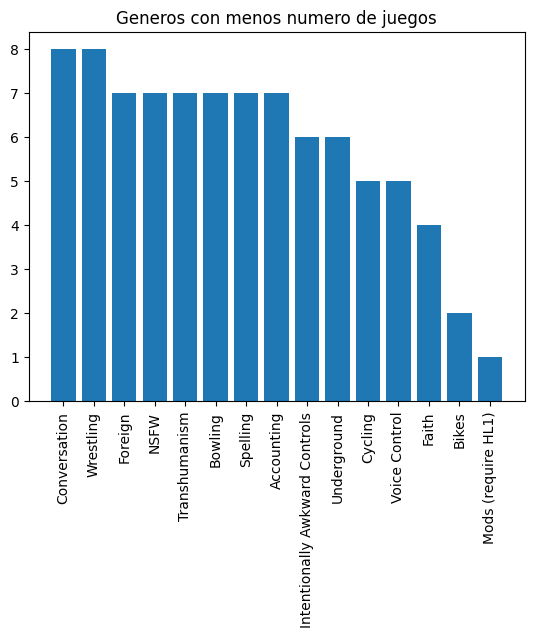

In [19]:
plt.bar(steam_genres2['genres'].astype(str),steam_genres2['count'].astype(int))
plt.title('Generos con menos numero de juegos')
plt.xticks(rotation=90)
plt.show()